# Anomaly Detection 
Anomaly Detection is a popular usecase of Machine Learning. As per wikipedia,
> Anomaly Detection is generally understood to be the identification of rare items, events or observations which deviate significantly from the majority of the data and do not conform to a well defined notion of normal behavior.

Therefore, it finds it application in software-industry. For instance, in monitoring of firm-resources, if suddenly CPU reaches 100% of consumption in non-working hours while the traffic is a flat-line, this cues a system failure or possible attack. A good Anomaly Detection system will flag this and alarm the relevant team.

This system can be automated using ML by implementation of one/many of various algorithms/models. In this repo, I have tried using some of them: Isolation forest, K-NN etc.

***

## Dataset-1 
Dataset-1 is a univariate time series which means a single variable historical series (with timestamps). There are a few data analysis jargons we must take into consideration to to understand the **nature** of the data:
The data is a 30 day observations of a single numeric variable
1. Trend: There is no monotonic increase or decrease. 
2. Seasonality: No seasonality is detectable. 
3. Stationarity: Almost stationary. 
4. Correlation: Adjacent days are mildly correlated.
5. No clusters: The data has clear clusters formed.

Dataset 1 is as follows:

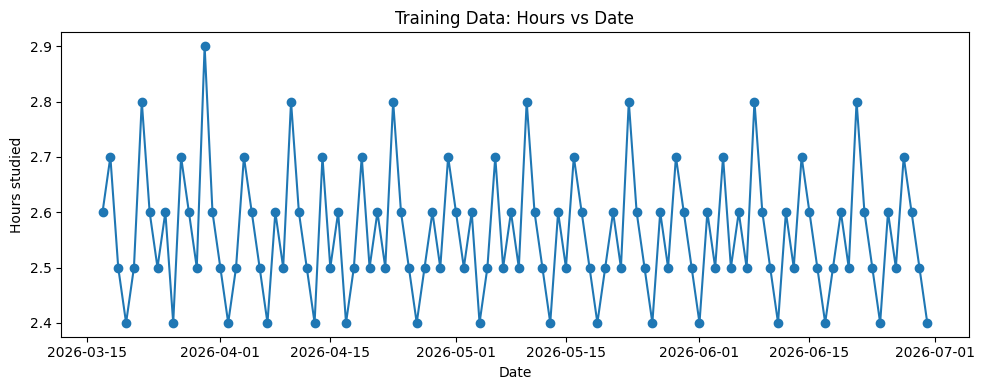

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

dataset1 = pd.read_csv('./data/train1.csv', parse_dates=["date"])
traindataset1_df = dataset1.sort_values("date").reset_index(drop=True)
plt.figure(figsize=(10, 4))
plt.plot(traindataset1_df["date"], traindataset1_df["hours"], marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Hours studied")
plt.title("Training Data: Hours vs Date")
plt.tight_layout()
plt.show()

Testing Dataset1 is as follows:

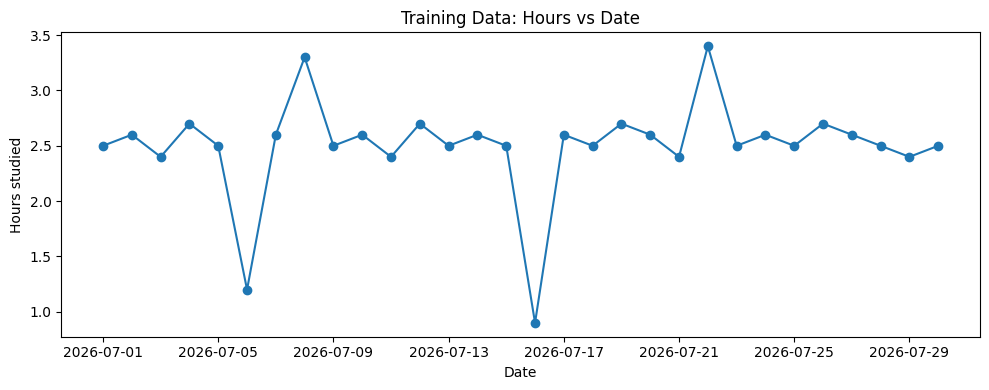

In [8]:

dataset1 = pd.read_csv('./data/test1.csv', parse_dates=["date"])
testdataset1_df = dataset1.sort_values("date").reset_index(drop=True)
plt.figure(figsize=(10, 4))
plt.plot(testdataset1_df["date"], testdataset1_df["hours"], marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Hours studied")
plt.title("Training Data: Hours vs Date")
plt.tight_layout()
plt.show()

Clearly, the model should output the four dates: `2026-07-06`, `2026-07-08`, `2026-07-16` and `2026-07-22` as they are the anomalies -> far distant from the normal.
I implemented **Isolation-forest**, **OC-SVM**, **k-NN**, and **Autoencoders** for the task. The results were differing. k-NN gave the best result. The following line (which i have to still think more about) passes the judgement:
>k-NN’s local density approach aligns perfectly with small, single-variable data where anomalies are just points far from the cluster of normals.